In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Xử lí dữ liệu ban đầu (upload chess data vào drive và dùng, không cần chạy)

In [ ]:
!pip install opencv-python

In [ ]:
!pip install pillow

In [ ]:
# Pillow là thư viện thao tác với hình ảnh

In [ ]:
# os là thư viện tương tác với hệ điều hình

In [ ]:
import os

In [ ]:
from PIL import Image, ImageDraw, ImageFont

In [ ]:
dataList = os.listdir("C:/Users/ADMIN/Downloads/chess_data")

In [ ]:
print(dataList)

['bishop_resized', 'Chess', 'chest_best_model.h5', 'King', 'king-resize', 'knight-resize', 'pawn_resized', 'Queen-Resized', 'Rook-resize', 'Test', 'train', 'validation']


In [ ]:
direction= "C:/Users/ADMIN/Downloads/chess_data"

In [ ]:
# new train data folder

In [ ]:
trainData= os.path.join(direction,"train")
os.mkdir(trainData)

In [ ]:
trainBishopData= os.path.join(trainData,"Bishop")
os.mkdir(trainBishopData)

trainPawnData= os.path.join(trainData,"Pawn")
os.mkdir(trainPawnData)

trainKnightData= os.path.join(trainData,"Knight")
os.mkdir(trainKnightData)

trainRookData= os.path.join(trainData,"Rook")
os.mkdir(trainRookData)

trainQueenData= os.path.join(trainData,"Queen")
os.mkdir(trainQueenData)

trainKingData= os.path.join(trainData,"King")
os.mkdir(trainKingData)

In [ ]:
# new validation data folder

In [ ]:
validData= os.path.join(direction,"validation")
os.mkdir(validData)

In [ ]:
validBishopData= os.path.join(validData,"Bishop")
os.mkdir(validBishopData)

validBishopData= os.path.join(validData,"Pawn")
os.mkdir(validBishopData)

validBishopData= os.path.join(validData,"Knight")
os.mkdir(validBishopData)

validBishopData= os.path.join(validData,"Rook")
os.mkdir(validBishopData)

validBishopData= os.path.join(validData,"Queen")
os.mkdir(validBishopData)

validKingData= os.path.join(validData,"King")
os.mkdir(validKingData)

### CHIA DỮ LIỆU CHO TRAINING VÀ VALIDATION

In [ ]:
train_ratio = 0.8
val_ratio = test_ratio = 0.1

In [ ]:
# Bishop direction
Bishop_source= "/content/drive/MyDrive/chess_data/resized/bishop_resized/"
Bishop_train= "/content/drive/MyDrive/chess_data/train/Bishop/"
Bishop_valid= "/content/drive/MyDrive/chess_data/validation/Bishop/"
Bishop_test= "/content/drive/MyDrive/chess_data/test/Bishop/"

# Knight direction
Knight_source= "/content/drive/MyDrive/chess_data/resized/knight_resized/"
Knight_train= "/content/drive/MyDrive/chess_data/train/Knight/"
Knight_valid= "/content/drive/MyDrive/chess_data/validation/Knight/"
Knight_test= "/content/drive/MyDrive/chess_data/test/Knight/"

# Pawn direction
Pawn_source= "/content/drive/MyDrive/chess_data/resized/pawn_resized/"
Pawn_train= "/content/drive/MyDrive/chess_data/train/Pawn/"
Pawn_valid= "/content/drive/MyDrive/chess_data/validation/Pawn/"
Pawn_test= "/content/drive/MyDrive/chess_data/test/Pawn/"

# Rook direction
Rook_source= "/content/drive/MyDrive/chess_data/resized/rook_resized/"
Rook_train= "/content/drive/MyDrive/chess_data/train/Rook/"
Rook_valid= "/content/drive/MyDrive/chess_data/validation/Rook/"
Rook_test= "/content/drive/MyDrive/chess_data/test/Rook/"

# Queen direction
Queen_source= "/content/drive/MyDrive/chess_data/resized/queen_resized/"
Queen_train= "/content/drive/MyDrive/chess_data/train/Queen/"
Queen_valid= "/content/drive/MyDrive/chess_data/validation/Queen/"
Queen_test= "/content/drive/MyDrive/chess_data/test/Queen/"

# King direction
King_source= "/content/drive/MyDrive/chess_data/resized/king_resized/"
King_train= "/content/drive/MyDrive/chess_data/train/King/"
King_valid= "/content/drive/MyDrive/chess_data/validation/King/"
King_test= "/content/drive/MyDrive/chess_data/test/King/"

Source = [Bishop_source, Knight_source, Pawn_source, Rook_source, Queen_source, King_source]

**Make directory**

In [ ]:
def create_directories(dir_list):
  for dir_name in dir_list:
    if not os.path.exists(dir_name):
      os.makedirs(dir_name)
    else:
      print(f"Directory already exists: {dir_name}")
dir_list = [Bishop_train, Bishop_valid,Knight_train,Knight_valid, Pawn_train, Pawn_valid, Rook_train, Rook_valid,Queen_train, Queen_valid,King_train, King_valid]
create_directories(dir_list)

In [ ]:
create_directories([Bishop_test, King_test, Knight_test, Pawn_test, Queen_test, Rook_test])

In [ ]:
import random
import shutil
def split_data(source, training, validation, testing):
    # Loop through each class folder
    images = os.listdir(source)
    random.shuffle(images)
      # Split images based on ratios
    train_size = int(len(images) * train_ratio)
    val_size = int(len(images) * val_ratio)
    train_images, val_images, test_images = images[:train_size], images[train_size:train_size+val_size], images[train_size+val_size:]

    # copy the train image
    for filename in train_images:
        this = source + filename
        destination = training + filename
        shutil.copyfile(this, destination)
    # copy the valid image
    for filename in val_images:
        this = source + filename
        destination = validation + filename
        shutil.copyfile(this, destination)
    # copy the test image
    for filename in test_images:
        this = source + filename
        destination = testing + filename
        shutil.copyfile(this, destination)

In [ ]:
split_data(Bishop_source, Bishop_train, Bishop_valid,Bishop_test)
split_data(Knight_source, Knight_train, Knight_valid,Knight_test)
split_data(Pawn_source, Pawn_train, Pawn_valid,Pawn_test)
split_data(Rook_source, Rook_train, Rook_valid,Rook_test)
split_data(Queen_source, Queen_train, Queen_valid,Queen_test)
split_data(King_source, King_train, King_valid,King_test)

In [ ]:
total_images = sum(len(files) for _, _, files in os.walk('/content/drive/MyDrive/chess_data/validation'))
total_images

113

**Sau khi chia dữ liệu ở máy thì upload folder lên google drive để truy cập thông qua collab**

In [ ]:
# Bishop direction
Bishop_source= "/content/drive/MyDrive/chess_data/resized/bishop_resized/"
Bishop_train= "/content/drive/MyDrive/chess_data/train/Bishop/"
Bishop_valid= "/content/drive/MyDrive/chess_data/validation/Bishop/"
Bishop_test= "/content/drive/MyDrive/chess_data/test/Bishop/"

# Knight direction
Knight_source= "/content/drive/MyDrive/chess_data/resized/knight_resized/"
Knight_train= "/content/drive/MyDrive/chess_data/train/Knight/"
Knight_valid= "/content/drive/MyDrive/chess_data/validation/Knight/"
Knight_test= "/content/drive/MyDrive/chess_data/test/Knight/"

# Pawn direction
Pawn_source= "/content/drive/MyDrive/chess_data/resized/pawn_resized/"
Pawn_train= "/content/drive/MyDrive/chess_data/train/Pawn/"
Pawn_valid= "/content/drive/MyDrive/chess_data/validation/Pawn/"
Pawn_test= "/content/drive/MyDrive/chess_data/test/Pawn/"

# Rook direction
Rook_source= "/content/drive/MyDrive/chess_data/resized/rook_resized/"
Rook_train= "/content/drive/MyDrive/chess_data/train/Rook/"
Rook_valid= "/content/drive/MyDrive/chess_data/validation/Rook/"
Rook_test= "/content/drive/MyDrive/chess_data/test/Rook/"

# Queen direction
Queen_source= "/content/drive/MyDrive/chess_data/resized/queen_resized/"
Queen_train= "/content/drive/MyDrive/chess_data/train/Queen/"
Queen_valid= "/content/drive/MyDrive/chess_data/validation/Queen/"
Queen_test= "/content/drive/MyDrive/chess_data/test/Queen/"

# King direction
King_source= "/content/drive/MyDrive/chess_data/resized/king_resized/"
King_train= "/content/drive/MyDrive/chess_data/train/King/"
King_valid= "/content/drive/MyDrive/chess_data/validation/King/"
King_test= "/content/drive/MyDrive/chess_data/test/King/"

Source = [Bishop_source, Knight_source, Pawn_source, Rook_source, Queen_source, King_source]

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt

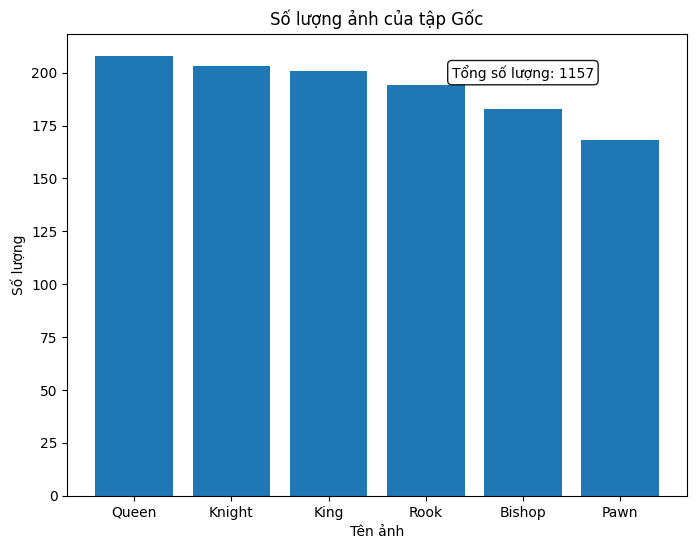

{'Bishop': 183, 'Knight': 203, 'Pawn': 168, 'Rook': 194, 'Queen': 208, 'King': 201}


In [ ]:
def dataShow(Source, image_counts={}, name=""):
  for folder in Source:
    chess = ((str(folder).split("/")[-2]).split("_")[0]).title()
    files = listdir(folder)
    for filename in files:
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
          if chess in image_counts:
            image_counts[chess] += 1
          else:
            image_counts[chess] = 1
  df = pd.DataFrame.from_dict(image_counts, orient='index', columns=['Count'])
  df = df.sort_values('Count', ascending=False)

  plt.figure(figsize=(8, 6))
  plt.bar(df.index, df['Count'])
  plt.xlabel('Tên ảnh')
  plt.ylabel('Số lượng')
  plt.title(f'Số lượng ảnh của tập {name}')
  # Add text object with bbox for positioning
  plt.text(4, 200, f"Tổng số lượng: {sum(image_counts.values())}", ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
  plt.show()
image_counts={}
dataShow(Source, image_counts, 'Gốc')
print(image_counts)

In [ ]:
print(sum(image_counts.values()))

1157


### Tăng sinh dữ liệu (Dùng kỹ thuật Albumentation)

In [ ]:
!pip install albumentations --quiet
!pip install colorama --quiet
!pip install opencv-python --quiet

In [ ]:
import albumentations as A
import cv2
from colorama import Fore, Back, Style
import os
# Declare an augmentation pipeline
transforms_1 = A.Compose([
            A.Rotate(limit=40),
            A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5),
            A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
            A.HorizontalFlip()
        ])
transforms_2 = A.Compose([
        A.HorizontalFlip(p=0.5),  # Random horizontal flip
        A.VerticalFlip(p=0.5),     # Random vertical flip
        A.RandomRotate90(p=0.5),   # Random rotation by 90, 180, or 270 degrees
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=10, p=0.5),
                            # Random shift, scale, and rotation within specified limits
        A.ElasticTransform(alpha=0.1, sigma=0.1, alpha_affine=0.1, p=0.5),
                            # Elastic deformation with moderate distortion
        A.RandomBrightnessContrast(brightness_limit=0.05, contrast_limit=0.1, p=0.5),
                            # Random adjustments to brightness and contrast
        A.RandomGamma(gamma_limit=0.2, p=0.5),   # Random gamma correction
        A.GaussianBlur(blur_limit=7, p=0.5),        # Random Gaussian blur
        A.CLAHE(p=0.5)            # Contrast limited adaptive histogram equalization
    ])



/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/blur/transforms.py:184: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


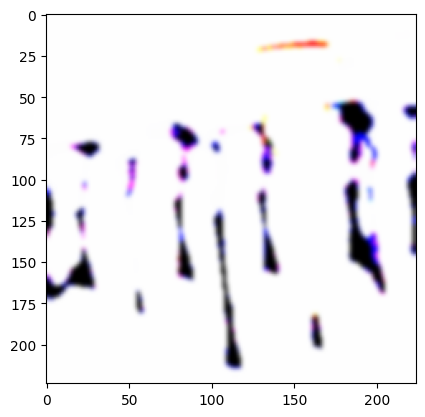

True

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
image_dir= '/content/drive/MyDrive/ahu'
image= plt.imread(os.path.join(image_dir, '00000138_resized.jpg'))
#cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
transformed= transforms_2(image=image)
# Phải có hàng dưới để lấy dữ liệu đã transform
transformed_image = transformed["image"]
plt.imshow(transformed_image)
plt.show()
base_name, _ = os.path.splitext('00000138_resized.jpg')
output_path = os.path.join('/content/drive/MyDrive/test', f"{base_name}_augmented.jpg")
transformed_image = transformed_image.astype(np.uint8)
transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)
#transformed_image = np.clip(transformed_image, 0, 255)
cv2.imwrite(output_path, transformed_image)

**Hàm tăng sinh dữ liệu**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def augmentation(input_dir, output_dir, augmentation):
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)
  for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
      # Read the image
      image = cv2.imread(os.path.join(image_dir, filename))

      # Augment the image
      augmented_image = augmentation(image=image)
      transformed_image = augmented_image["image"]
      # Get filename without extension
      base_name, _ = os.path.splitext(filename)

      # Create output path with same filename and extension
      output_path = os.path.join(output_dir, f"{base_name}_augmented.jpg")
      if os.path.exists(output_path):
        base_name, _ = os.path.splitext(output_path)
        output_path = os.path.join(output_dir, f"{base_name}(1).jpg")

      transformed_image = transformed_image.astype(np.uint8)
      transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)
      # Save the augmented image
      cv2.imwrite(output_path, transformed_image)


####**Thực hiện tăng sinh cho các folder (không chạy lại)**

In [ ]:
%%capture
image_dir = "/content/drive/MyDrive/chess_data/train/Bishop"
output_dir = "/content/drive/MyDrive/chess_data/train/Bishop_aug"
augmentation(image_dir, output_dir, transforms_1)
augmentation(image_dir, output_dir, transforms_2)

In [ ]:
%%capture
image_dir = "/content/drive/MyDrive/chess_data/train/King"
output_dir = "/content/drive/MyDrive/chess_data/train/King_aug"
augmentation(image_dir, output_dir, transforms_1)
augmentation(image_dir, output_dir, transforms_2)

In [ ]:
# Không show kết quả
%%capture
image_dir = "/content/drive/MyDrive/chess_data/train/Knight"
output_dir = "/content/drive/MyDrive/chess_data/train/Knight_aug"
augmentation(image_dir, output_dir, transforms_1)
augmentation(image_dir, output_dir, transforms_2)

In [ ]:
%%capture
image_dir = "/content/drive/MyDrive/chess_data/train/Pawn"
output_dir = "/content/drive/MyDrive/chess_data/train/Pawn_aug"
augmentation(image_dir, output_dir, transforms_1)
augmentation(image_dir, output_dir, transforms_2)

In [ ]:
%%capture
image_dir = "/content/drive/MyDrive/chess_data/train/Queen"
output_dir = "/content/drive/MyDrive/chess_data/train/Queen_aug"
augmentation(image_dir, output_dir, transforms_1)
augmentation(image_dir, output_dir, transforms_2)

In [ ]:
%%capture
image_dir = "/content/drive/MyDrive/chess_data/train/Rook"
output_dir = "/content/drive/MyDrive/chess_data/train/Rook_aug"
augmentation(image_dir, output_dir, transforms_1)
augmentation(image_dir, output_dir, transforms_2)

**Xóa folder nếu lỗi**

In [ ]:
import shutil
dir='/content/drive/MyDrive/chess_data/train/Rook_aug'
for filename in os.listdir(dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
      filepath= os.path.join(dir, filename)
      os.remove(filepath)
shutil.rmtree(dir)

####**Chuẩn bị dữ liệu**

In [ ]:
source_folder = "/content/drive/MyDrive/chess_data/train/Bishop"
destination_folder = "/content/drive/MyDrive/chess_data/train/Bishop_aug"

In [ ]:

for filename in os.listdir(source_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        shutil.copy(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))

In [ ]:
import glob
image_files = glob.glob(os.path.join(destination_folder, "*.jpg")) + glob.glob(os.path.join(destination_folder, "*.png"))
print(len(image_files))

438


In [ ]:
source_folder = "/content/drive/MyDrive/chess_data/train/King"
destination_folder = "/content/drive/MyDrive/chess_data/train/King_aug"

In [ ]:
for filename in os.listdir(source_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        shutil.copy(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))

In [ ]:
source_folder = "/content/drive/MyDrive/chess_data/train/Knight"
destination_folder = "/content/drive/MyDrive/chess_data/train/Knight_aug"

In [ ]:
for filename in os.listdir(source_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        shutil.copy(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))

In [ ]:
source_folder = "/content/drive/MyDrive/chess_data/train/Pawn"
destination_folder = "/content/drive/MyDrive/chess_data/train/Pawn_aug"

In [ ]:
for filename in os.listdir(source_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        shutil.copy(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))

In [ ]:
source_folder = "/content/drive/MyDrive/chess_data/train/Queen"
destination_folder = "/content/drive/MyDrive/chess_data/train/Queen_aug"

In [ ]:
for filename in os.listdir(source_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        shutil.copy(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))

In [ ]:
source_folder = "/content/drive/MyDrive/chess_data/train/Rook"
destination_folder = "/content/drive/MyDrive/chess_data/train/Rook_aug"

In [ ]:
for filename in os.listdir(source_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        shutil.copy(os.path.join(source_folder, filename), os.path.join(destination_folder, filename))

**Di chuyển sang folder mới**

In [ ]:
train_aug ='/content/drive/MyDrive/chess_data/train_aug'
shutil.move('/content/drive/MyDrive/chess_data/train/King_aug', train_aug)
shutil.move('/content/drive/MyDrive/chess_data/train/Knight_aug', train_aug)
shutil.move('/content/drive/MyDrive/chess_data/train/Pawn_aug', train_aug)
shutil.move('/content/drive/MyDrive/chess_data/train/Queen_aug', train_aug)
shutil.move('/content/drive/MyDrive/chess_data/train/Rook_aug', train_aug)
shutil.move('/content/drive/MyDrive/chess_data/train/Bishop_aug', train_aug)

'/content/drive/MyDrive/chess_data/train_aug/Bishop_aug'

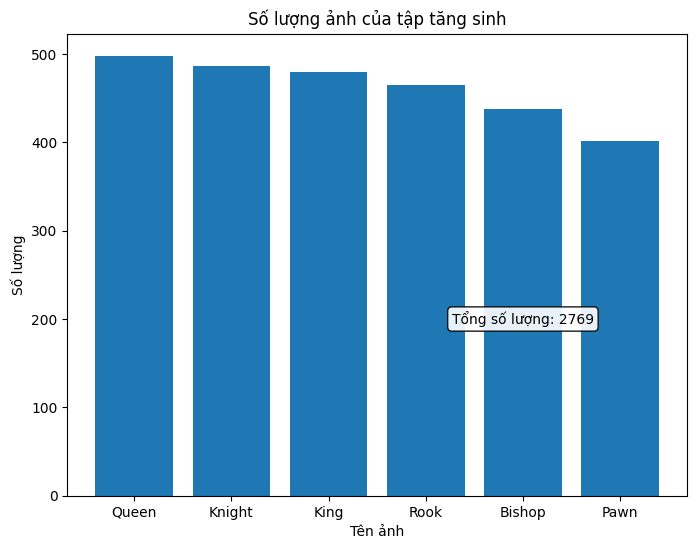

{'Bishop': 438, 'King': 480, 'Knight': 486, 'Pawn': 402, 'Queen': 498, 'Rook': 465}


In [ ]:
Bishop_source= "/content/drive/MyDrive/chess_data/train_aug/Bishop_aug/"
King_source= "/content/drive/MyDrive/chess_data/train_aug/King_aug/"
Knight_source= "/content/drive/MyDrive/chess_data/train_aug/Knight_aug/"
Pawn_source= "/content/drive/MyDrive/chess_data/train_aug/Pawn_aug/"
Queen_source= "/content/drive/MyDrive/chess_data/train_aug/Queen_aug/"
Rook_source= "/content/drive/MyDrive/chess_data/train_aug/Rook_aug/"
image_counts={}
New_source=[Bishop_source,King_source,Knight_source,Pawn_source,Queen_source,Rook_source]
dataShow(New_source, image_counts, 'tăng sinh')
print(image_counts)

### CÁC BƯỚC XÂY DỰNG MODEL


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
from glob import glob

In [3]:
img_width= 224
img_height= 224
batch_size = 32
epochs = 100


In [4]:
NumOfClasses = len(glob('/content/drive/MyDrive/chess_data-20240317T002204Z-001/chess_data/train_aug/*'))
print(NumOfClasses)

6


In [5]:
 #rescale để chuyển dữ liệu về khoảng 0-1 (thay đổi image data generator)
training_dir = "/content/drive/MyDrive/chess_data-20240317T002204Z-001/chess_data/train_aug"
train_datagen= ImageDataGenerator(rescale=1/255.0)
# load image
train_generator = train_datagen.flow_from_directory(training_dir,batch_size=batch_size,class_mode='categorical', target_size=(img_height,img_width))

Found 2769 images belonging to 6 classes.


In [6]:
valid_dir = "/content/drive/MyDrive/chess_data-20240317T002204Z-001/chess_data/validation"
valid_datagen = ImageDataGenerator(rescale=1/255.0)
valid_generator = valid_datagen.flow_from_directory(valid_dir,batch_size=batch_size,class_mode='categorical', target_size=(img_height,img_width))

Found 113 images belonging to 6 classes.


In [7]:
test_dir = "/content/drive/MyDrive/chess_data-20240317T002204Z-001/chess_data/test"
test_datagen = ImageDataGenerator(rescale=1/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,batch_size=batch_size,class_mode='categorical', target_size=(img_height,img_width))

Found 121 images belonging to 6 classes.


####**Mạng MLP**

In [ ]:
#MLP
model_MLP = Sequential()

In [ ]:
model_MLP = Sequential([
    Flatten(input_shape=(img_height, img_width, 3)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(6, activation="softmax")  # Replace num_classes with actual number of classes
])
print(model_MLP.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               19267712  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 6)                 390       
                                                                 
Total params: 19276358 (73.53 MB)
Trainable params: 19276358 (73.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
bestModelFileName = "/content/drive/MyDrive/chess_data/chest_best_mlp_model.h5"
best_MLP_Model = ModelCheckpoint(bestModelFileName, monitor='val_accuracy', verbose=1, save_best_only=True)

In [ ]:
model_MLP.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
print("Training MLP network...")
H = model_MLP.fit(train_generator, validation_data=valid_generator, epochs=100,
batch_size=32, callbacks=best_MLP_Model)

Training MLP network...
Epoch 1/100
87/87 [==============================] - ETA: 0s - loss: 36.2145 - accuracy: 0.1766
Epoch 1: val_accuracy improved from -inf to 0.15929, saving model to /content/drive/MyDrive/chess_data/chest_best_mlp_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 28s 307ms/step - loss: 36.2145 - accuracy: 0.1766 - val_loss: 16.6517 - val_accuracy: 0.1593
Epoch 2/100
87/87 [==============================] - ETA: 0s - loss: 13.8030 - accuracy: 0.1871
Epoch 2: val_accuracy improved from 0.15929 to 0.18584, saving model to /content/drive/MyDrive/chess_data/chest_best_mlp_model.h5
87/87 [==============================] - 14s 161ms/step - loss: 13.8030 - accuracy: 0.1871 - val_loss: 9.8813 - val_accuracy: 0.1858
Epoch 3/100
87/87 [==============================] - ETA: 0s - loss: 7.7458 - accuracy: 0.1950
Epoch 3: val_accuracy did not improve from 0.18584
87/87 [==============================] - 13s 147ms/step - loss: 7.7458 - accuracy: 0.1950 - val_loss: 7.7833 - val_accuracy: 0.1681
Epoch 4/100
87/87 [==============================] - ETA: 0s - loss: 4.7782 - accuracy: 0.2315
Epoch 4: val_accuracy improved from 0.18584 to 0.20354, saving model to /content/drive/MyDrive/chess_data/chest_best_mlp_model.h5
87/8

In [ ]:
loss, accuracy = model_MLP.evaluate(test_generator)

4/4 [==============================] - 33s 11s/step - loss: 2.0302 - accuracy: 0.2810


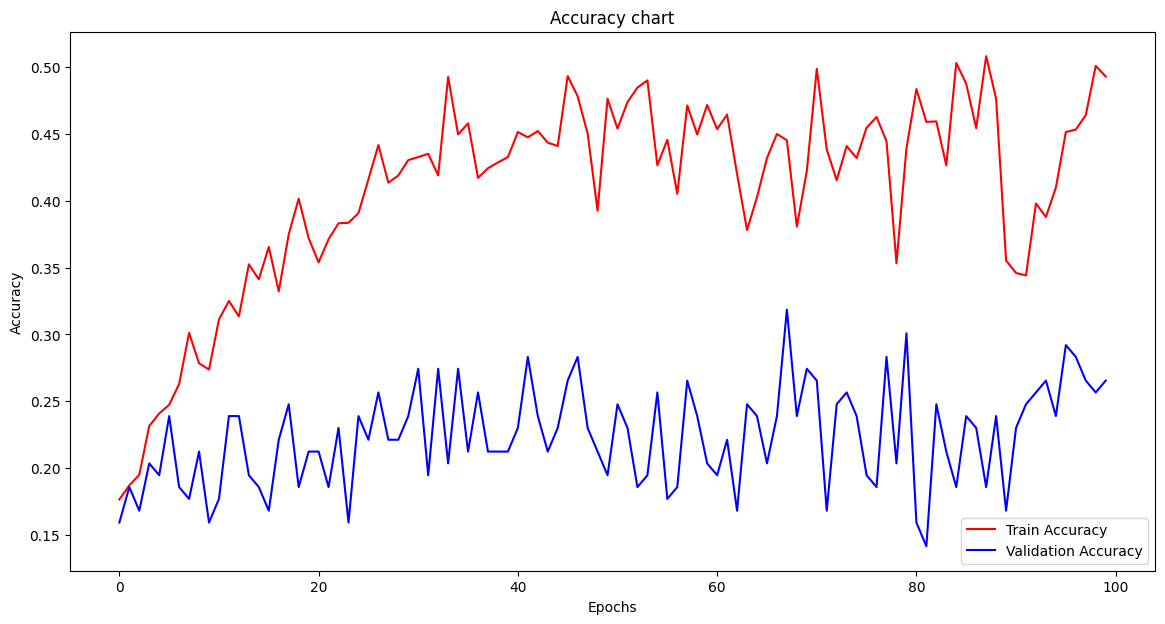

In [ ]:
# Result
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

# visualize accuracy chart
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy chart')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('MLP Test Accuracy: ', accuracy)

MLP Test Accuracy:  0.28099173307418823


####**Mạng CNN**

In [ ]:
# Callback
# Trong earlyStopping: patience=5 nghĩa là sẽ dừng lại sau 5 epoch nếu monitor (ở đây là hàm loss) không cải thiện, verbose = 1 show kết quả train, mode='auto' dừng train khi hàm loss không tăng không giảm
callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
bestModelFileName = "C:/Users/ADMIN/Downloads/chess_data/chest_best_CNN_model.h5"
bestModel = ModelCheckpoint(bestModelFileName, monitor='val_accuracy', verbose=1, save_best_only=True)

In [ ]:
#Model CNN
model_CNN = Sequential(
    [Conv2D(32,(3,3), activation='relu', input_shape=(img_height, img_width,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(256,(3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(512, activation='relu'),
    Dense(512, activation='relu'),

    Dense(NumOfClasses, activation='softmax')]
)
print(model_CNN.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 64)       

In [ ]:
# Compile the model with Adam Optimizer
model_CNN.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_CNN.fit(train_generator, epochs=100,batch_size=32, verbose=1, validation_data=valid_generator, callbacks=bestModel)


Epoch 1/100
87/87 [==============================] - ETA: 0s - loss: 0.2729 - accuracy: 0.8971
Epoch 1: val_accuracy improved from -inf to 0.57522, saving model to C:/Users/ADMIN/Downloads/chess_data/chest_best_CNN_model.h5
87/87 [==============================] - 17s 150ms/step - loss: 0.2729 - accuracy: 0.8971 - val_loss: 3.7646 - val_accuracy: 0.5752


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/100
87/87 [==============================] - ETA: 0s - loss: 0.2364 - accuracy: 0.9101
Epoch 2: val_accuracy did not improve from 0.57522
87/87 [==============================] - 13s 147ms/step - loss: 0.2364 - accuracy: 0.9101 - val_loss: 3.8955 - val_accuracy: 0.5752
Epoch 3/100
87/87 [==============================] - ETA: 0s - loss: 0.2499 - accuracy: 0.9104
Epoch 3: val_accuracy improved from 0.57522 to 0.60177, saving model to C:/Users/ADMIN/Downloads/chess_data/chest_best_CNN_model.h5
87/87 [==============================] - 13s 147ms/step - loss: 0.2499 - accuracy: 0.9104 - val_loss: 3.4585 - val_accuracy: 0.6018
Epoch 4/100
87/87 [==============================] - ETA: 0s - loss: 0.2174 - accuracy: 0.9187
Epoch 4: val_accuracy did not improve from 0.60177
87/87 [==============================] - 14s 154ms/step - loss: 0.2174 - accuracy: 0.9187 - val_loss: 4.1717 - val_accuracy: 0.5841
Epoch 5/100
87/87 [==============================] - ETA: 0s - loss: 0.1890 - accurac

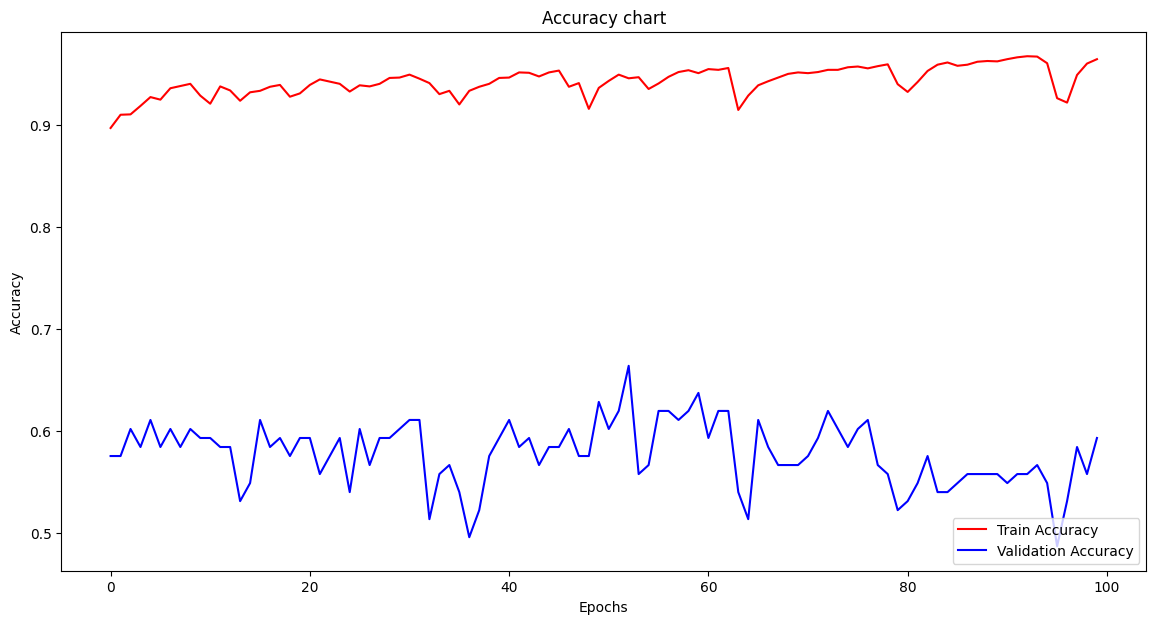

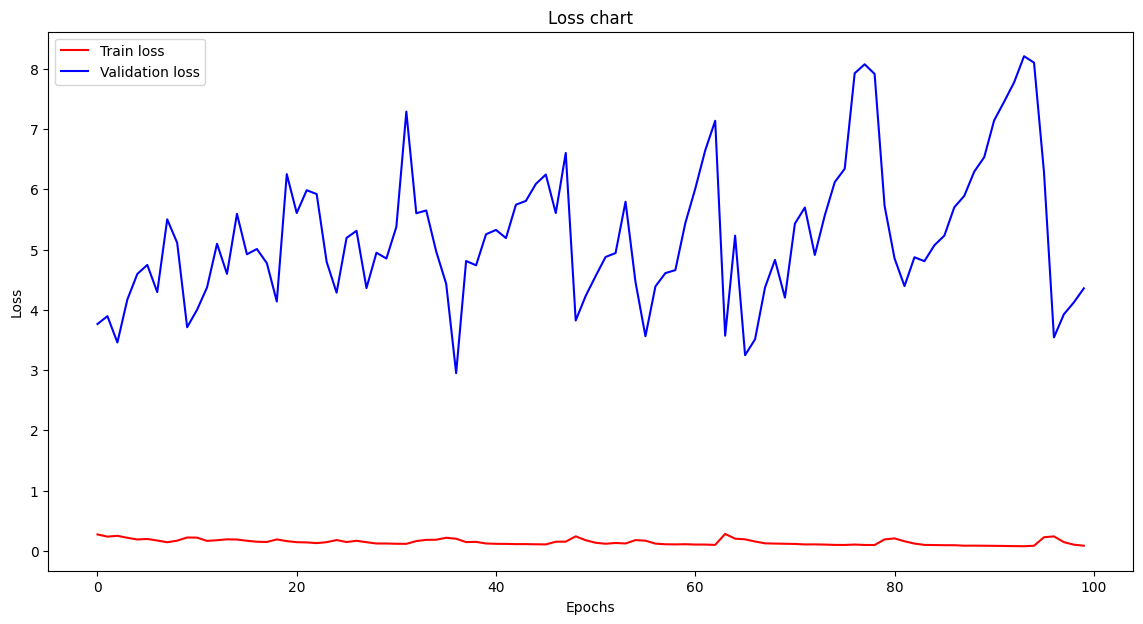

In [ ]:
# Result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# visualize accuracy chart
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy chart')
plt.legend(loc='lower right')
plt.show()

# visualize loss chart
fig1 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss chart')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print(f"Validation Accuracy: {val_acc[-1]:.4f}")

Validation Accuracy: 0.5929


In [ ]:
loss, accuracy = model_CNN.evaluate(test_generator)

4/4 [==============================] - 32s 11s/step - loss: 3.9735 - accuracy: 0.6198


In [ ]:
print('CNN Test Accuracy: ',accuracy)

CNN Test Accuracy:  0.6198347210884094


#### **Mạng VGG16**

In [10]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Define the pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional layers in the pre-trained model
for layer in base_model.layers[:14]:
    layer.trainable = False
# Add new layers for classification
x = base_model.output
x = Flatten()(x)
x = Dropout(0.7)(x)
predictions = Dense(NumOfClasses, activation='softmax')(x)

# Create the new model
model_VGG16 = Model(inputs=base_model.input, outputs=predictions)
print(model_VGG16.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

**Data set không liên quan đến tập ImageNet và dữ liệu cũng rất nhỏ nên đóng băng 50% base model VGG16**

#### Layer[:11] == False
- Không dùng drop out
- Callbacks: Learning rate scheduler, ES

In [ ]:
|
# Callback: Giảm learningrate làm cho mô hình hội tụ tốt hơn, giảm overfitting
LRS = LearningRateScheduler(scheduler)
early_stopping=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Compile the model
model_VGG16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_VGG16.fit(train_generator, epochs=100, verbose=1, validation_data=valid_generator, callbacks=early_stopping)


Epoch 1/100
87/87 [==============================] - 2112s 24s/step - loss: 2.1166 - accuracy: 0.1658 - val_loss: 1.7900 - val_accuracy: 0.1770
Epoch 2/100
87/87 [==============================] - 18s 206ms/step - loss: 1.7902 - accuracy: 0.1755 - val_loss: 1.7893 - val_accuracy: 0.1770
Epoch 3/100
28/87 [========>.....................] - ETA: 11s - loss: 1.7900 - accuracy: 0.1862

In [ ]:
bestModelFileName = "C:/Users/ADMIN/Downloads/chess_data//content/drive/MyDrive/chess_data-20240317T002204Z-001/chess_data/chest_best_CNN_model.h5"
bestModel = ModelCheckpoint(bestModelFileName, monitor='val_accuracy', verbose=1, save_best_only=True)
model_VGG16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_2 = model_VGG16.fit(train_generator, epochs=30, verbose=1, validation_data=valid_generator, callbacks=[bestModel, early_stopping])

Epoch 1/100
87/87 [==============================] - ETA: 0s - loss: 1.7898 - accuracy: 0.1712
Epoch 1: val_accuracy improved from -inf to 0.17699, saving model to C:/Users/ADMIN/Downloads/chess_data//content/drive/MyDrive/chess_data-20240317T002204Z-001/chess_data/chest_best_CNN_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 22s 204ms/step - loss: 1.7898 - accuracy: 0.1712 - val_loss: 1.7888 - val_accuracy: 0.1770
Epoch 2/100
87/87 [==============================] - ETA: 0s - loss: 1.7896 - accuracy: 0.1798
Epoch 2: val_accuracy did not improve from 0.17699
87/87 [==============================] - 17s 195ms/step - loss: 1.7896 - accuracy: 0.1798 - val_loss: 1.7888 - val_accuracy: 0.1770
Epoch 3/100
87/87 [==============================] - ETA: 0s - loss: 1.7896 - accuracy: 0.1798
Epoch 3: val_accuracy did not improve from 0.17699
87/87 [==============================] - 17s 197ms/step - loss: 1.7896 - accuracy: 0.1798 - val_loss: 1.7888 - val_accuracy: 0.1770
Epoch 4/100
87/87 [==============================] - ETA: 0s - loss: 1.7897 - accuracy: 0.1798
Epoch 4: val_accuracy did not improve from 0.17699
87/87 [==============================] - 17s 191ms/step - loss: 1.7897 - accuracy: 0.1798 - val_loss: 1.7888 - val_accuracy: 0.1770
Epoch 5/100
87/87 [===============

#### All layers trainable = False
- Drop out =0.7

In [ ]:
bestModelFileName = "/content/drive/MyDrive/chess_data/chest_best_vgg_model.h5"
best_VGG_Model = ModelCheckpoint(bestModelFileName, monitor='val_accuracy', verbose=1, save_best_only=True)
early_stopping=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Compile the model
model_VGG16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_VGG16.fit(train_generator, epochs=5, verbose=1, validation_data=valid_generator, callbacks=[early_stopping, best_VGG_Model])

Epoch 1/100
87/87 [==============================] - ETA: 0s - loss: 1.6194 - accuracy: 0.4290 
Epoch 1: val_accuracy improved from -inf to 0.61062, saving model to /content/drive/MyDrive/chess_data/chest_best_vgg_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 1801s 21s/step - loss: 1.6194 - accuracy: 0.4290 - val_loss: 1.0574 - val_accuracy: 0.6106
Epoch 2/100
87/87 [==============================] - ETA: 0s - loss: 0.9782 - accuracy: 0.6457 
Epoch 2: val_accuracy improved from 0.61062 to 0.66372, saving model to /content/drive/MyDrive/chess_data/chest_best_vgg_model.h5
87/87 [==============================] - 1776s 20s/step - loss: 0.9782 - accuracy: 0.6457 - val_loss: 1.0435 - val_accuracy: 0.6637
Epoch 3/100
87/87 [==============================] - ETA: 0s - loss: 0.7929 - accuracy: 0.7039 
Epoch 3: val_accuracy did not improve from 0.66372
87/87 [==============================] - 1791s 21s/step - loss: 0.7929 - accuracy: 0.7039 - val_loss: 1.0506 - val_accuracy: 0.6549
Epoch 4/100
87/87 [==============================] - ETA: 0s - loss: 0.6491 - accuracy: 0.7570 
Epoch 4: val_accuracy improved from 0.66372 to 0.69912, saving model to /content/drive/MyDrive/chess_data/chest_best_vgg_model.h5
87/87

####Layer[:14] ==False
-  Dropout = 0.7





In [11]:
bestModelFileName = "/content/drive/MyDrive/chess_data/chest_best_vgg_model.h5"
best_VGG_Model = ModelCheckpoint(bestModelFileName, monitor='val_accuracy', verbose=1, save_best_only=True)
early_stopping=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Compile the model
model_VGG16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_VGG16.fit(train_generator, epochs=5, verbose=1, validation_data=valid_generator, callbacks=[early_stopping, best_VGG_Model])

Epoch 1/5
87/87 [==============================] - ETA: 0s - loss: 1.8456 - accuracy: 0.1770 
Epoch 1: val_accuracy improved from -inf to 0.17699, saving model to /content/drive/MyDrive/chess_data/chest_best_vgg_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 1052s 12s/step - loss: 1.8456 - accuracy: 0.1770 - val_loss: 1.7909 - val_accuracy: 0.1770
Epoch 2/5
87/87 [==============================] - ETA: 0s - loss: 1.7907 - accuracy: 0.1798
Epoch 2: val_accuracy did not improve from 0.17699
87/87 [==============================] - 17s 198ms/step - loss: 1.7907 - accuracy: 0.1798 - val_loss: 1.7902 - val_accuracy: 0.1770
Epoch 3/5
87/87 [==============================] - ETA: 0s - loss: 1.7903 - accuracy: 0.1798
Epoch 3: val_accuracy did not improve from 0.17699
87/87 [==============================] - 15s 169ms/step - loss: 1.7903 - accuracy: 0.1798 - val_loss: 1.7898 - val_accuracy: 0.1770
Epoch 4/5
87/87 [==============================] - ETA: 0s - loss: 1.7900 - accuracy: 0.1798
Epoch 4: val_accuracy did not improve from 0.17699
87/87 [==============================] - 14s 161ms/step - loss: 1.7900 - accuracy: 0.1798 - val_loss: 1.7894 - val_accuracy: 0.1770
Epoch 5/5
87/87 [=======================

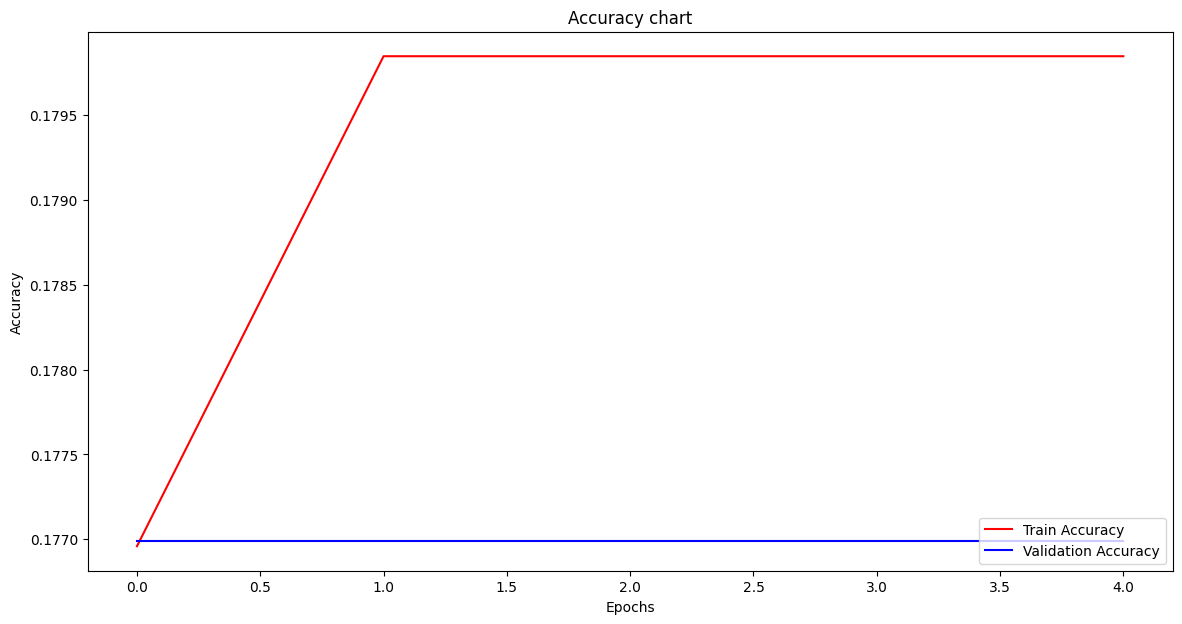

In [12]:
# Result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# visualize accuracy chart
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy chart')
plt.legend(loc='lower right')
plt.show()

In [13]:

# Evaluate the model
loss, accuracy = model_VGG16.evaluate(test_generator)
print('VGG16 Test Accuracy: ', accuracy)

4/4 [==============================] - 37s 12s/step - loss: 1.7898 - accuracy: 0.1818
VGG16 Test Accuracy:  0.1818181872367859


#### All layer = False, Drop out =0.7, Epochs=5, callbacks= ES, MCP


In [15]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False
# Add new layers for classification
x = base_model.output
x = Flatten()(x)
x = Dropout(0.7)(x)
predictions = Dense(NumOfClasses, activation='softmax')(x)

# Create the new model
model_VGG16 = Model(inputs=base_model.input, outputs=predictions)
model_VGG16.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [16]:
bestModelFileName = "/content/drive/MyDrive/chess_data/chest_best_vgg_2_model.h5"
best_VGG_Model = ModelCheckpoint(bestModelFileName, monitor='val_accuracy', verbose=1, save_best_only=True)
early_stopping=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Compile the model
model_VGG16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_VGG16.fit(train_generator, epochs=5, verbose=1, validation_data=valid_generator, callbacks=[early_stopping, best_VGG_Model])

Epoch 1/5
87/87 [==============================] - ETA: 0s - loss: 1.6852 - accuracy: 0.4272
Epoch 1: val_accuracy improved from -inf to 0.66372, saving model to /content/drive/MyDrive/chess_data/chest_best_vgg_2_model.h5
87/87 [==============================] - 16s 170ms/step - loss: 1.6852 - accuracy: 0.4272 - val_loss: 1.0275 - val_accuracy: 0.6637
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - ETA: 0s - loss: 0.9549 - accuracy: 0.6468
Epoch 2: val_accuracy did not improve from 0.66372
87/87 [==============================] - 15s 174ms/step - loss: 0.9549 - accuracy: 0.6468 - val_loss: 1.0008 - val_accuracy: 0.6549
Epoch 3/5
87/87 [==============================] - ETA: 0s - loss: 0.7953 - accuracy: 0.6927
Epoch 3: val_accuracy improved from 0.66372 to 0.67257, saving model to /content/drive/MyDrive/chess_data/chest_best_vgg_2_model.h5
87/87 [==============================] - 20s 233ms/step - loss: 0.7953 - accuracy: 0.6927 - val_loss: 1.1291 - val_accuracy: 0.6726
Epoch 4/5
87/87 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.7425
Epoch 4: val_accuracy did not improve from 0.67257
87/87 [==============================] - 14s 157ms/step - loss: 0.6970 - accuracy: 0.7425 - val_loss: 0.9911 - val_accuracy: 0.6549
Epoch 5/5
87/87 [==============================] - ETA: 0s - loss: 0.6289 - accuracy: 0.7732
Epoch 5:

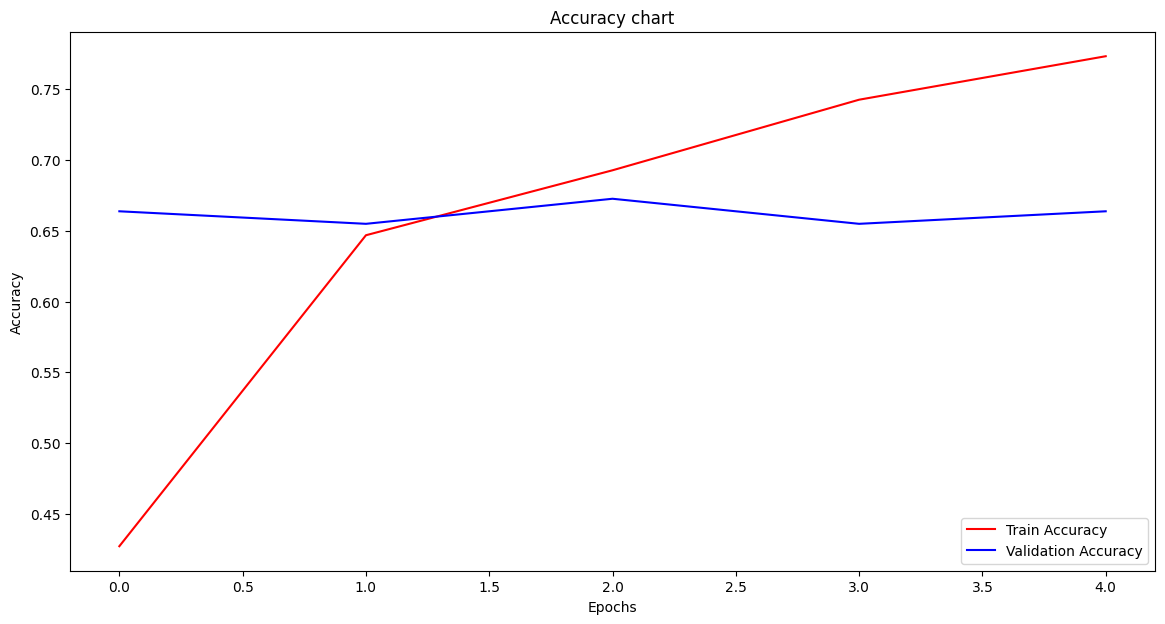

In [17]:
# Result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# visualize accuracy chart
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy chart')
plt.legend(loc='lower right')
plt.show()

In [18]:

# Evaluate the model
loss, accuracy = model_VGG16.evaluate(test_generator)
print('VGG16 Test Accuracy: ', accuracy)

4/4 [==============================] - 1s 143ms/step - loss: 0.5948 - accuracy: 0.8017
VGG16 Test Accuracy:  0.8016529083251953


#### All layer = False, Drop out =0.7, Epochs=30, callbacks= ES, MCP


In [19]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False
# Add new layers for classification
x = base_model.output
x = Flatten()(x)
x = Dropout(0.7)(x)
predictions = Dense(NumOfClasses, activation='softmax')(x)

# Create the new model
model_VGG16 = Model(inputs=base_model.input, outputs=predictions)

In [20]:
bestModelFileName = "/content/drive/MyDrive/chess_data/chest_best_vgg_2_1_model.h5"
best_VGG_Model = ModelCheckpoint(bestModelFileName, monitor='val_accuracy', verbose=1, save_best_only=True)
early_stopping=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Compile the model
model_VGG16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_VGG16.fit(train_generator, epochs=30, verbose=1, validation_data=valid_generator, callbacks=[early_stopping, best_VGG_Model])

Epoch 1/30
87/87 [==============================] - ETA: 0s - loss: 1.6291 - accuracy: 0.4453
Epoch 1: val_accuracy improved from -inf to 0.64602, saving model to /content/drive/MyDrive/chess_data/chest_best_vgg_2_1_model.h5
87/87 [==============================] - 17s 182ms/step - loss: 1.6291 - accuracy: 0.4453 - val_loss: 1.1249 - val_accuracy: 0.6460
Epoch 2/30
87/87 [==============================] - ETA: 0s - loss: 0.9941 - accuracy: 0.6334
Epoch 2: val_accuracy improved from 0.64602 to 0.69027, saving model to /content/drive/MyDrive/chess_data/chest_best_vgg_2_1_model.h5
87/87 [==============================] - 32s 370ms/step - loss: 0.9941 - accuracy: 0.6334 - val_loss: 1.0050 - val_accuracy: 0.6903
Epoch 3/30
87/87 [==============================] - ETA: 0s - loss: 0.8117 - accuracy: 0.7035
Epoch 3: val_accuracy did not improve from 0.69027
87/87 [==============================] - 15s 167ms/step - loss: 0.8117 - accuracy: 0.7035 - val_loss: 1.0517 - val_accuracy: 0.6372
Epoch 

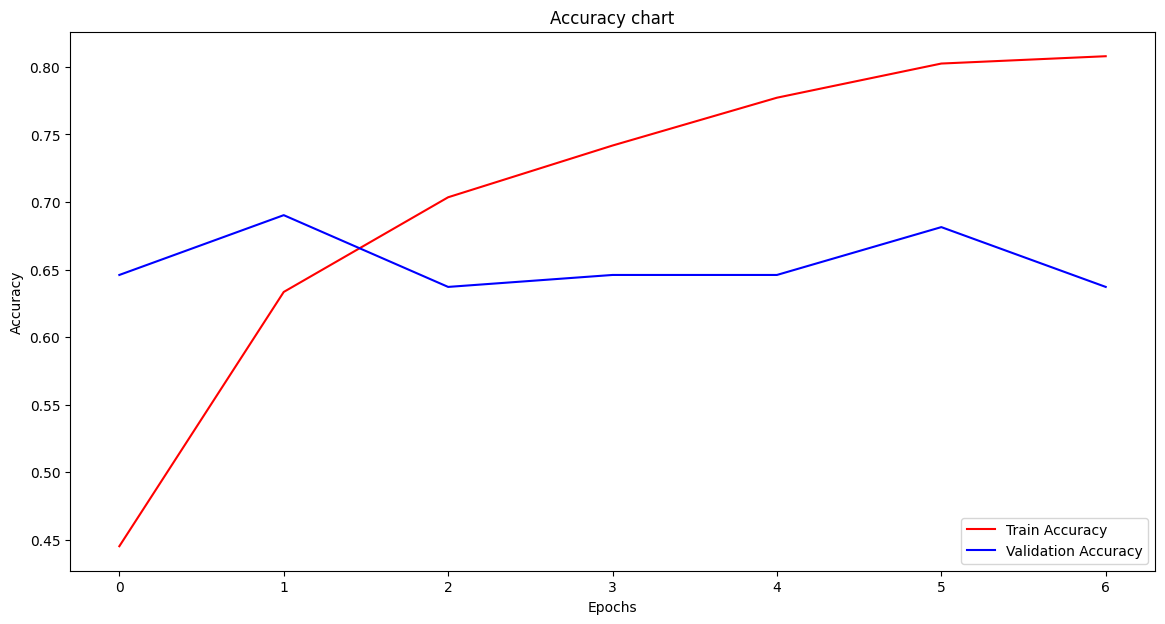

In [21]:
# Result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# visualize accuracy chart
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy chart')
plt.legend(loc='lower right')
plt.show()

In [22]:

# Evaluate the model
loss, accuracy = model_VGG16.evaluate(test_generator)
print('VGG16 Test Accuracy: ', accuracy)

4/4 [==============================] - 1s 134ms/step - loss: 0.5949 - accuracy: 0.7686
VGG16 Test Accuracy:  0.7685950398445129


#### All layer = False, Drop out =0.7, Epochs=30, Callbacks = Modelcheckpoint



In [23]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False
# Add new layers for classification
x = base_model.output
x = Flatten()(x)
x = Dropout(0.7)(x)
predictions = Dense(NumOfClasses, activation='softmax')(x)

# Create the new model
model_VGG16 = Model(inputs=base_model.input, outputs=predictions)

In [24]:
bestModelFileName = "/content/drive/MyDrive/chess_data/chest_best_vgg_2_2_model.h5"
best_VGG_Model = ModelCheckpoint(bestModelFileName, monitor='val_accuracy', verbose=1, save_best_only=True)
early_stopping=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Compile the model
model_VGG16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_VGG16.fit(train_generator, epochs=30, verbose=1, validation_data=valid_generator, callbacks= best_VGG_Model)

Epoch 1/30
87/87 [==============================] - ETA: 0s - loss: 1.6624 - accuracy: 0.4218
Epoch 1: val_accuracy improved from -inf to 0.64602, saving model to /content/drive/MyDrive/chess_data/chest_best_vgg_2_2_model.h5
87/87 [==============================] - 15s 166ms/step - loss: 1.6624 - accuracy: 0.4218 - val_loss: 0.9852 - val_accuracy: 0.6460
Epoch 2/30
87/87 [==============================] - ETA: 0s - loss: 1.0073 - accuracy: 0.6349
Epoch 2: val_accuracy did not improve from 0.64602
87/87 [==============================] - 14s 160ms/step - loss: 1.0073 - accuracy: 0.6349 - val_loss: 1.0289 - val_accuracy: 0.6460
Epoch 3/30
87/87 [==============================] - ETA: 0s - loss: 0.8089 - accuracy: 0.6977
Epoch 3: val_accuracy improved from 0.64602 to 0.67257, saving model to /content/drive/MyDrive/chess_data/chest_best_vgg_2_2_model.h5
87/87 [==============================] - 16s 179ms/step - loss: 0.8089 - accuracy: 0.6977 - val_loss: 1.1094 - val_accuracy: 0.6726
Epoch 

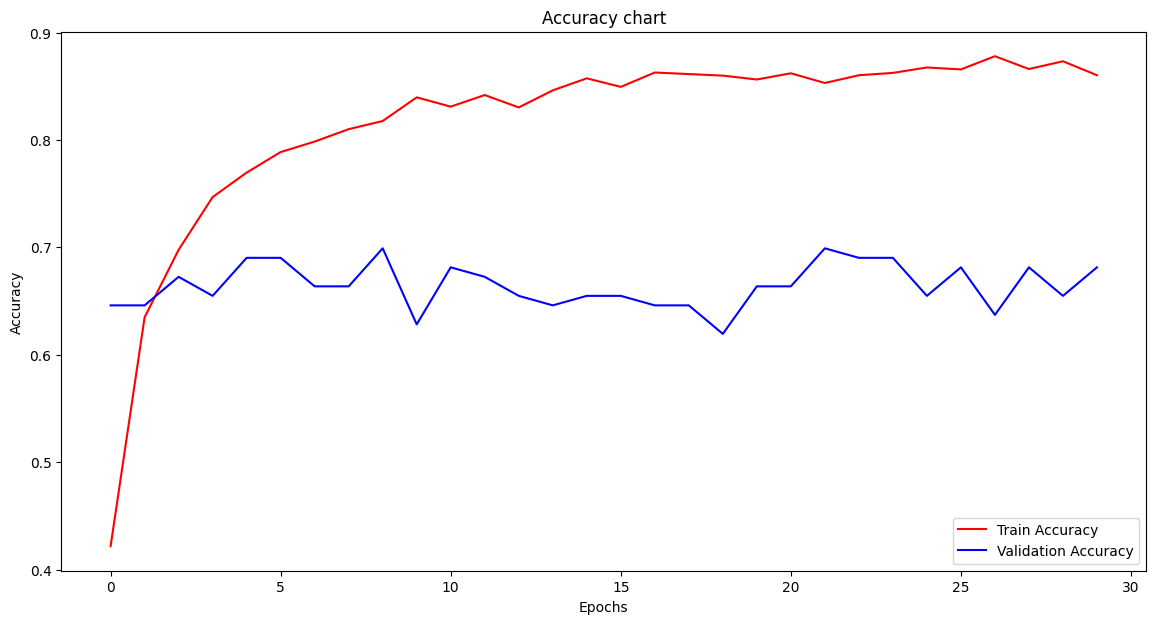

In [25]:
# Result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# visualize accuracy chart
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy chart')
plt.legend(loc='lower right')
plt.show()

In [26]:

# Evaluate the model
loss, accuracy = model_VGG16.evaluate(test_generator)
print('VGG16 Test Accuracy: ', accuracy)

4/4 [==============================] - 1s 148ms/step - loss: 0.7567 - accuracy: 0.7686
VGG16 Test Accuracy:  0.7685950398445129


#### **Dự đoán kết quả dựa trên ảnh**

In [127]:
# Predict
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import pandas as pd
import numpy as np
image_width = 224
image_height = 224
classes = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen','Rook']


In [128]:
# load model
model = load_model("/content/drive/MyDrive/chess_data/chest_best_vgg_2_2_model.h5")

In [129]:
# image preprocessing
def image_preprocessing(path):
    image = load_img(path, target_size=(image_height, image_width))
    image_result = img_to_array(image)
    image_result = np.expand_dims(image_result, axis = 0)
    image_result =image_result/255.0
    return image_result


In [130]:
test_path = "/content/drive/MyDrive/chess_data-20240317T002204Z-001/chess_data/test/Bishop/53_resized.jpg"

In [131]:
imageforModel = image_preprocessing(test_path)

In [132]:
print(imageforModel.shape)

(1, 224, 224, 3)


In [133]:
resultArray = model.predict(imageforModel, batch_size=32, verbose=1)

1/1 [==============================] - 0s 127ms/step


In [134]:
resultArray

array([[9.9842203e-01, 1.8796620e-04, 6.0137711e-04, 1.0666285e-04,
        6.5465405e-04, 2.7387092e-05]], dtype=float32)

In [135]:
result = np.argmax(resultArray, axis=1)
print(result)

[0]


In [136]:
text=classes[result[0]]
print(text)

Bishop


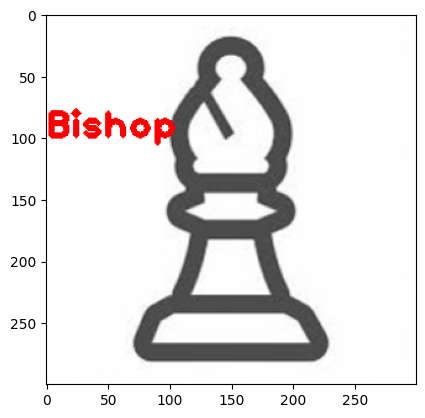

In [137]:
import cv2
img = cv2.imread(test_path)
font = cv2.FONT_HERSHEY_PLAIN
resized_img = cv2.resize(img, (300, int(img.shape[0] * 300 / img.shape[1])))
cv2.putText(resized_img, text,(0,100),font, 2, (255,0,0), 4)

plt.imshow(resized_img)
plt.show()